In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif, RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train_data = pd.read_csv("C:\\Users\\fongr\\Documents\\Мои документы\\Второй курс\\python\\scientificProject1\\data\\train.csv")
test_data = pd.read_csv("C:\\Users\\fongr\\Documents\\Мои документы\\Второй курс\\python\\scientificProject1\\data\\test.csv")

In [3]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229292 entries, 0 to 229291
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    229292 non-null  int64  
 1   Gender                229292 non-null  object 
 2   Age                   229292 non-null  int64  
 3   Driving_License       229292 non-null  int64  
 4   Region_Code           229292 non-null  float64
 5   Previously_Insured    229292 non-null  int64  
 6   Vehicle_Age           229292 non-null  object 
 7   Vehicle_Damage        229292 non-null  object 
 8   Annual_Premium        229292 non-null  float64
 9   Policy_Sales_Channel  229292 non-null  float64
 10  Vintage               229292 non-null  int64  
 11  Response              229292 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 21.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152862 entries, 0 to 152861
Data columns (total 

Из info видно, что ни в одном столбце нет пустых значений. Выполним деление на числовые и категориальные признаки

In [4]:
df_cat = ["Gender", "Vehicle_Age", "Vehicle_Damage"]
df_num = ["Age", "Driving_License", "Previously_Insured", "Region_Code", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]
df_all = df_num + df_cat
result_col = "Response"
train_data.drop("id", axis=1, inplace=True)

In [5]:
for col in df_cat:
    print(train_data[col].unique())

['Male' 'Female']
['1-2 Year' '< 1 Year' '> 2 Years']
['No' 'Yes']


In [6]:
for col in df_num:
    print(train_data[col].describe())

count    229292.000000
mean         38.554987
std          15.231658
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64
count    229292.000000
mean          0.998138
std           0.043114
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Driving_License, dtype: float64
count    229292.000000
mean          0.489062
std           0.499881
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Previously_Insured, dtype: float64
count    229292.000000
mean         26.420207
std          13.191474
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Region_Code, dtype: float64
count    229292.000000
mean      30730.076549
std       17054.686028
min        2630.000000
25%       24564.000000
50%       

Произведём кодирование категориальных признаков

In [7]:
le = LabelEncoder()
for column in df_cat:
    train_data[column] = le.fit_transform(train_data[column])
    test_data[column] = le.fit_transform(test_data[column])
    train_data[column] = train_data[column].astype("category")
    test_data[column] = test_data[column].astype("category")
    print(train_data[column].unique())

[1, 0]
Categories (2, int64): [0, 1]
[0, 1, 2]
Categories (3, int64): [0, 1, 2]
[0, 1]
Categories (2, int64): [0, 1]


Произведём нормирование всех числовых признаков

In [8]:
scaler = MinMaxScaler()
train_data[df_num] = scaler.fit_transform(train_data[df_num])
test_data[df_num] = scaler.fit_transform(test_data[df_num])
train_data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000
mean,0.285461,0.998138,0.508081,0.489062,0.052276,0.684714,0.498943,0.164079
std,0.234333,0.043114,0.253682,0.499881,0.031728,0.335236,0.289713,0.370348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,1.000000,0.288462,0.000000,0.040805,0.154321,0.249135,0.000000
50%,0.246154,1.000000,0.538462,0.000000,0.054097,0.858025,0.498270,0.000000
75%,0.446154,1.000000,0.673077,1.000000,0.068535,0.932099,0.750865,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Отбор информативных признаков
### Метод фильтрации

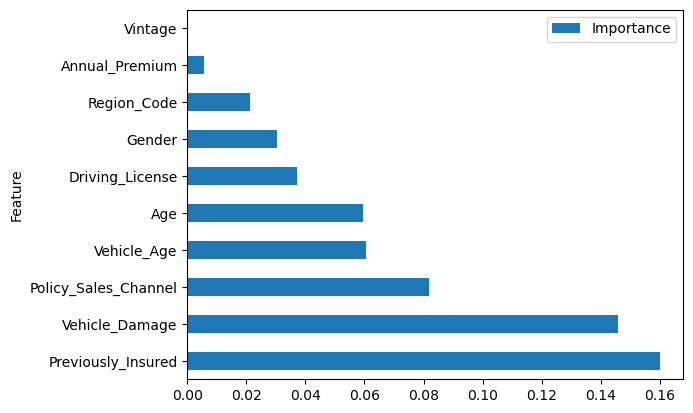

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

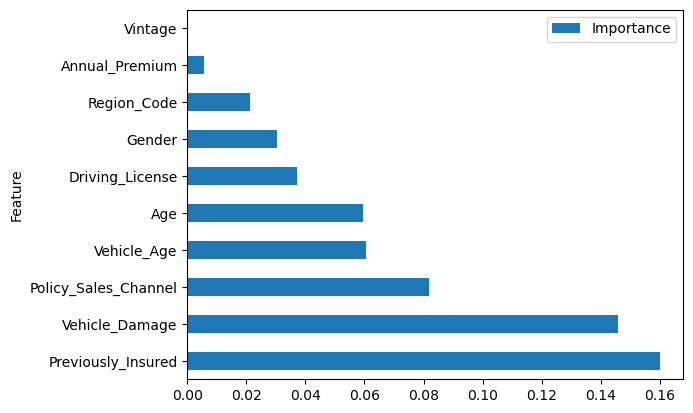

In [9]:
x = train_data[df_all]
y = train_data[result_col]
rating = mutual_info_classif(x, y, random_state=7)

compare_to_cols = pd.DataFrame({"Feature": x.columns, "Importance": rating})
compare_to_cols = compare_to_cols.sort_values("Importance", ascending=False)
n_features_select = 5
selected_features_mutual_info = compare_to_cols.head(n_features_select)["Feature"]
compare_to_cols.plot(kind="barh", x="Feature", y="Importance")
plt.show(selected_features_mutual_info)

In [ ]:
print(rating)

Метод обёртки

In [ ]:
clf = LinearRegression()
rfe = RFE(clf, n_features_to_select=n_features_select, step=1)
top_five = rfe.fit(x, y)
selected_features_RFE = top_five.get_feature_names_out()
print(selected_features_RFE)

In [ ]:
selector = SelectKBest(chi2, k=n_features_select)
selector.fit_transform(x, y)
selected_features_chi2 = selector.get_feature_names_out()